# Titanic Decision Trees



## Import Libs

In [396]:
import pandas as pd

## Import Datasets

In [397]:
df_train = pd.read_csv('/content/train.csv')
df_gender = pd.read_csv('/content/gender_submission.csv')
df_test = pd.read_csv('/content/test.csv')

In [398]:
#columns_necessary = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Embarked']
columns_necessary = ['Pclass', 'Sex', 'Age', 'Survived']
df_train_cleaned = df_train[columns_necessary]
df_train_cleaned

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
886,2,male,27.0,0
887,1,female,19.0,1
888,3,female,NaN,0
889,1,male,26.0,1


In [399]:
df_train_cleaned = df_train_cleaned.copy()

df_train_cleaned['Sex_C'] = df_train_cleaned['Sex'].replace({'male': 0, 'female': 1})
#df_train_cleaned['Embarked_C'] = df_train_cleaned['Embarked'].replace({'C': 0, 'S': 1, 'Q': 2})
#df_train_cleaned = df_train_cleaned.drop(['Sex', 'Embarked'], axis=1)
df_train_cleaned = df_train_cleaned.drop(['Sex'], axis=1)
df_train_cleaned

,Pclass,Age,Survived,Sex_C
0,3,22.0,0,0
1,1,38.0,1,1
2,3,26.0,1,1
3,1,35.0,1,1
4,3,35.0,0,0
...,...,...,...,...
886,2,27.0,0,0
887,1,19.0,1,1
888,3,NaN,0,1
889,1,26.0,1,0


In [400]:
df_train_cleaned.isnull().sum()

Pclass        0
Age         177
Survived      0
Sex_C         0
dtype: int64

In [401]:
df_train_cleaned = df_train_cleaned.dropna()
df_train_cleaned.isnull().sum()

Pclass      0
Age         0
Survived    0
Sex_C       0
dtype: int64

In [402]:
import pandas as pd
from sklearn import preprocessing

x = df_train_cleaned.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_train_normalized = pd.DataFrame(x_scaled, columns=df_train_cleaned.columns)
df_train_normalized

,Pclass,Age,Survived,Sex_C
0,1.0,0.271174,0.0,0.0
1,0.0,0.472229,1.0,1.0
2,1.0,0.321438,1.0,1.0
3,0.0,0.434531,1.0,1.0
4,1.0,0.434531,0.0,0.0
...,...,...,...,...
709,1.0,0.484795,0.0,1.0
710,0.5,0.334004,0.0,0.0
711,0.0,0.233476,1.0,1.0
712,0.0,0.321438,1.0,0.0


In [403]:
from sklearn.model_selection import train_test_split

y = df_train_cleaned['Survived']
df_train_cleaned = df_train_cleaned.drop('Survived', axis=1)
X = df_train_cleaned.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [404]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf.max_depth = 5
clf = clf.fit(X_train, y_train)

In [405]:
predictions = clf.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [406]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7796610169491526

In [407]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[127,   8],
       [ 44,  57]])

In [408]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.8769230769230769

In [409]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.74      0.94      0.83       135
    Survived       0.88      0.56      0.69       101

    accuracy                           0.78       236
   macro avg       0.81      0.75      0.76       236
weighted avg       0.80      0.78      0.77       236



<Axes: >

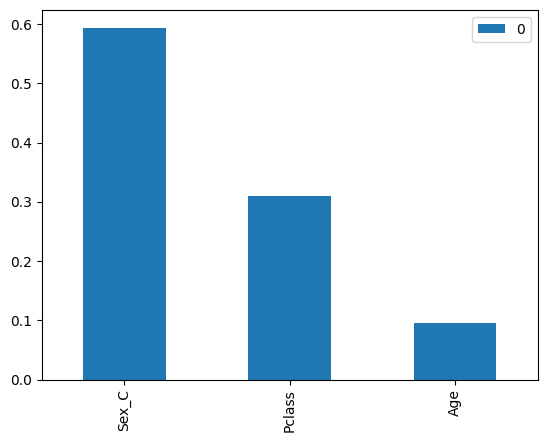

In [410]:
feature_names = X.columns
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance.head(10).plot(kind='bar')

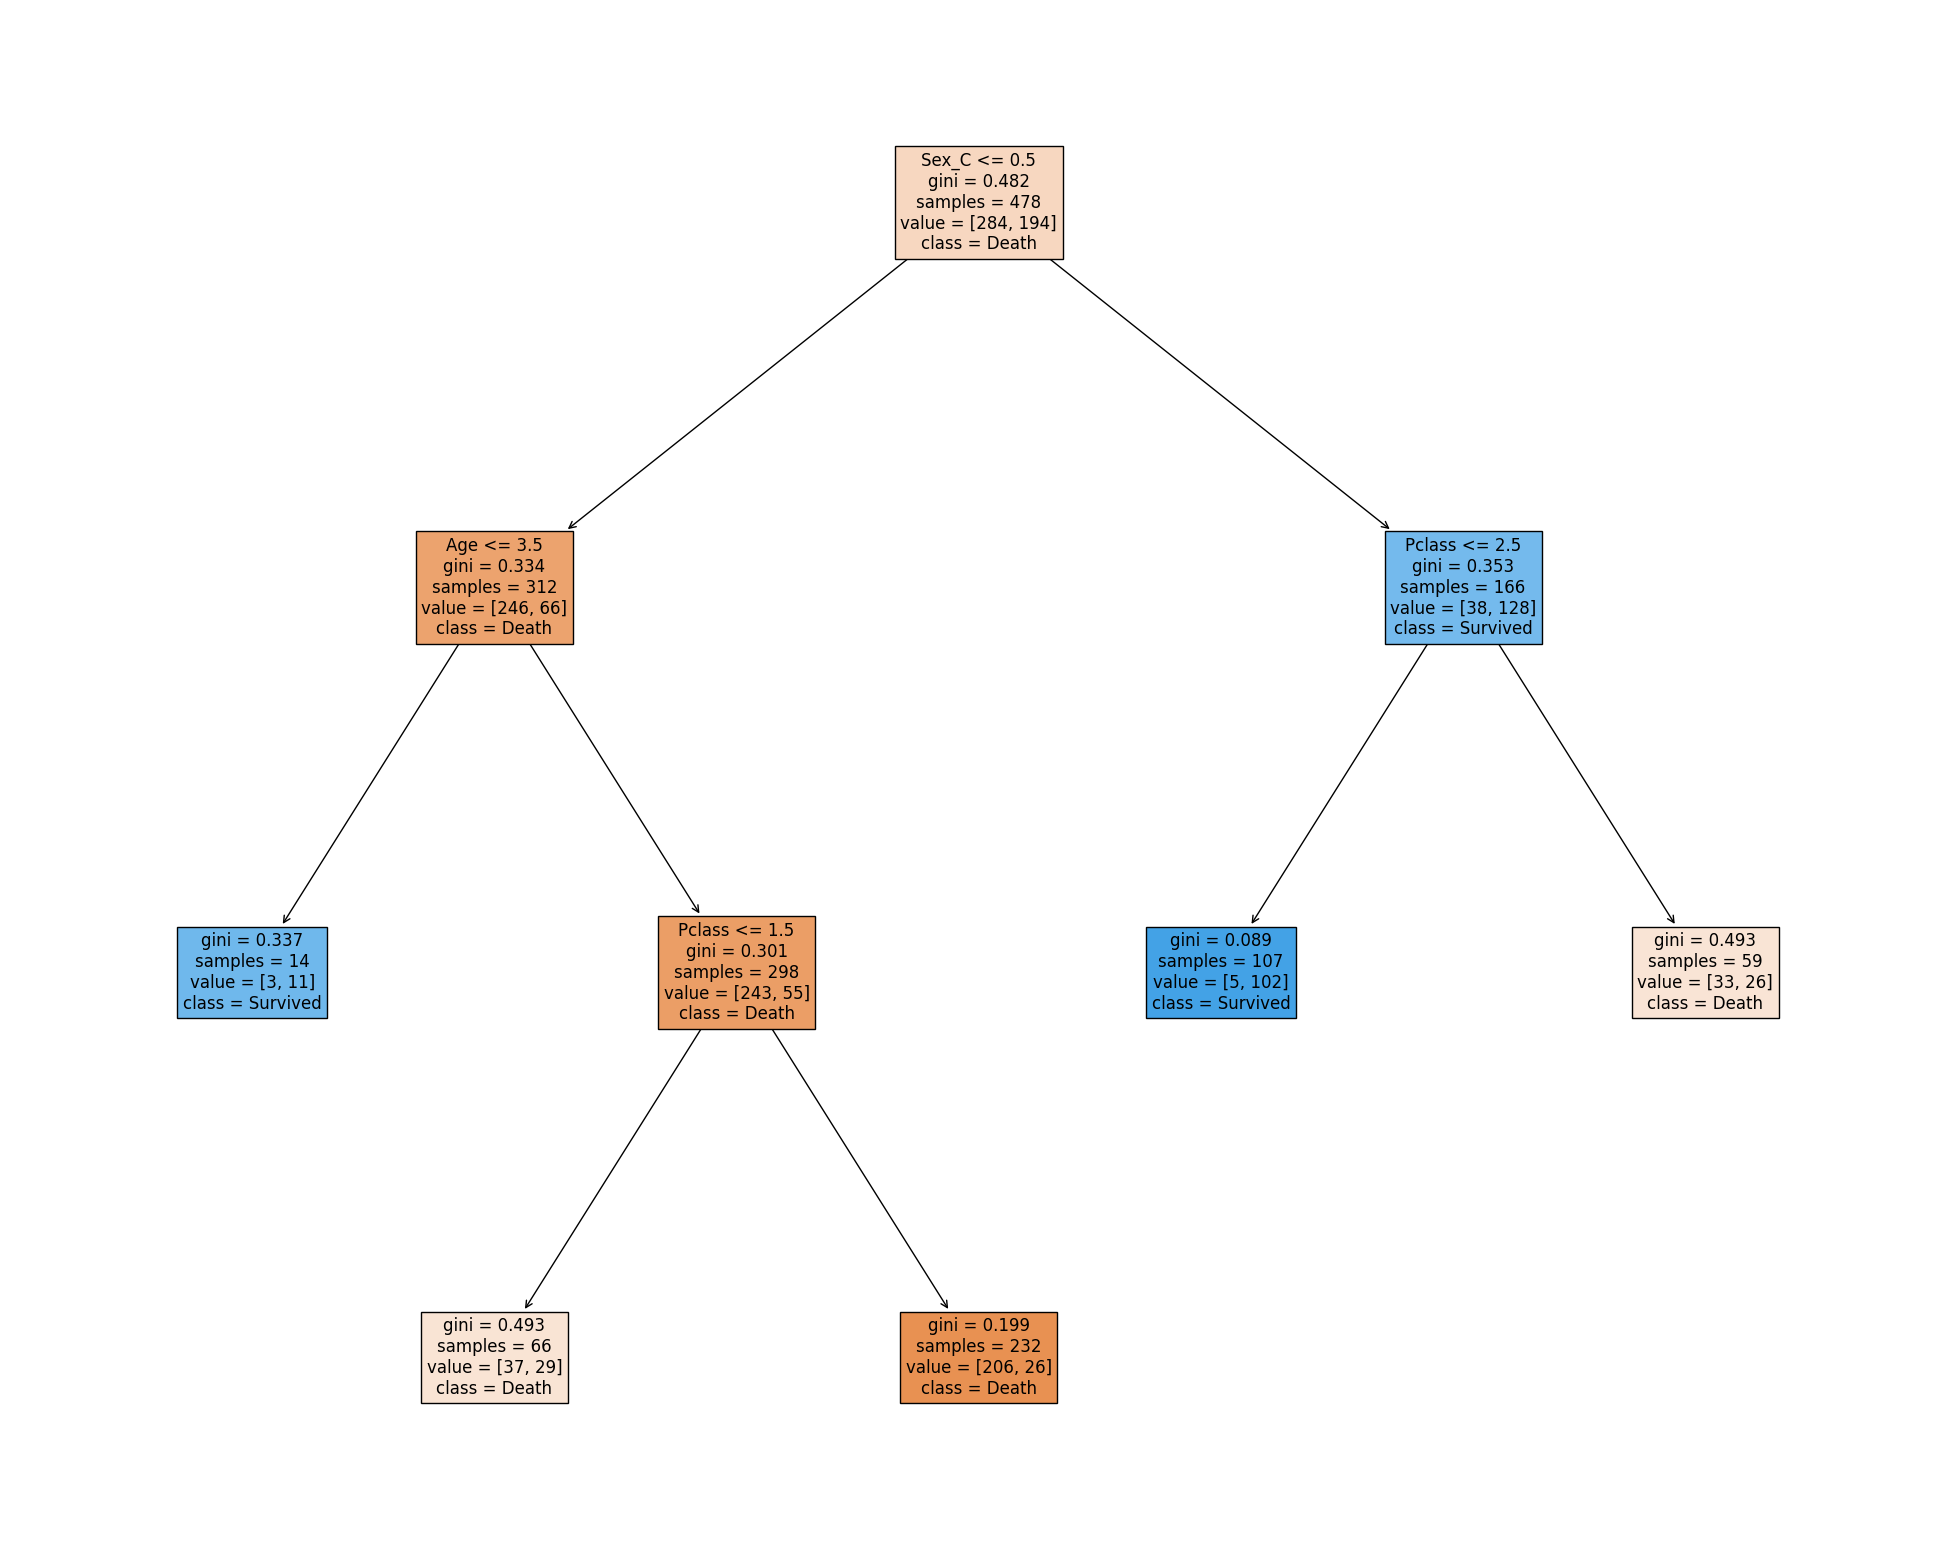

In [395]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0:'Death', 1:'Survived'},
                   filled=True,
                  fontsize=12)